# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [1]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.7.0'

#### Load Image Data

In [2]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

#### Generate Training and Validation Batches

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


C:\Users\kpete\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, DenseFeatures, Dropout, Conv2D, MaxPool2D, Flatten

vggmodel = tf.keras.applications.vgg16.VGG16(
    weights="imagenet", 
    input_shape=(224, 224, 3),
    include_top=False 
)  
vggmodel.trainable = False

type(vggmodel)

model = Sequential(
    [
        vggmodel,
        Flatten(),
        Dense(units = 256,activation='relu', name = 'feature_dense'),
        Dense(units = 4, activation = 'softmax', name = 'dense_1')
    ]
)

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer = opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 feature_dense (Dense)       (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,138,500
Trainable params: 6,423,812
Non-trainable params: 14,714,688
_________________________________________________________________


#### [5 points] Train Model

In [5]:

print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

history = model.fit_generator(steps_per_epoch = STEP_SIZE_TRAIN, generator = train_batches, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID, epochs=115
)


22
6


C:\Users\kpete\AppData\Local\Temp/ipykernel_14888/2354724368.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(steps_per_epoch = STEP_SIZE_TRAIN, generator = train_batches, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID, epochs=115
C:\Users\kpete\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\kpete\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/115
21/21 [==============================] - 35s 2s/step - loss: 0.5787 - accuracy: 0.3544 - val_loss: 0.5472 - val_accuracy: 0.4000
Epoch 2/115
21/21 [==============================] - 32s 2s/step - loss: 0.4862 - accuracy: 0.4951 - val_loss: 0.4437 - val_accuracy: 0.5600
Epoch 3/115
21/21 [==============================] - 33s 2s/step - loss: 0.4641 - accuracy: 0.4757 - val_loss: 0.4340 - val_accuracy: 0.6000
Epoch 4/115
21/21 [==============================] - 33s 2s/step - loss: 0.4398 - accuracy: 0.5485 - val_loss: 0.4416 - val_accuracy: 0.5000
Epoch 5/115
21/21 [==============================] - 33s 2s/step - loss: 0.4235 - accuracy: 0.6068 - val_loss: 0.4346 - val_accuracy: 0.5600
Epoch 6/115
21/21 [==============================] - 32s 2s/step - loss: 0.4100 - accuracy: 0.5922 - val_loss: 0.4048 - val_accuracy: 0.5400
Epoch 7/115
21/21 [==============================] - 33s 2s/step - loss: 0.3983 - accuracy: 0.6214 - val_loss: 0.4100 - val_accuracy: 0.6200
Epoch 8/115
2

Epoch 58/115
21/21 [==============================] - 18s 837ms/step - loss: 0.2664 - accuracy: 0.7476 - val_loss: 0.3554 - val_accuracy: 0.6000
Epoch 59/115
21/21 [==============================] - 17s 791ms/step - loss: 0.2557 - accuracy: 0.7816 - val_loss: 0.3455 - val_accuracy: 0.6400
Epoch 60/115
21/21 [==============================] - 17s 788ms/step - loss: 0.2565 - accuracy: 0.7961 - val_loss: 0.3253 - val_accuracy: 0.7000
Epoch 61/115
21/21 [==============================] - 17s 787ms/step - loss: 0.2587 - accuracy: 0.7816 - val_loss: 0.3100 - val_accuracy: 0.6800
Epoch 62/115
21/21 [==============================] - 17s 798ms/step - loss: 0.2711 - accuracy: 0.7524 - val_loss: 0.3178 - val_accuracy: 0.6600
Epoch 63/115
21/21 [==============================] - 17s 791ms/step - loss: 0.2664 - accuracy: 0.7767 - val_loss: 0.2809 - val_accuracy: 0.7200
Epoch 64/115
21/21 [==============================] - 17s 789ms/step - loss: 0.2713 - accuracy: 0.7670 - val_loss: 0.2823 - val_ac

#### [5 points] Plot Accuracy and Loss During Training

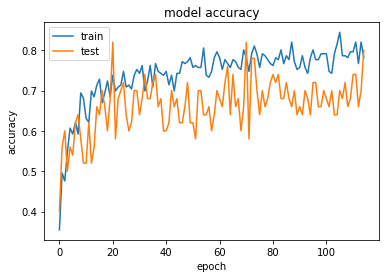

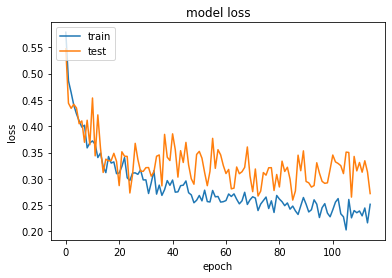

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Testing Model

In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
 2/36 [>.............................] - ETA: 2s - loss: 1.3187 - accuracy: 0.5000    

C:\Users\kpete\AppData\Local\Temp/ipykernel_14888/463003407.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),


36/36 [==============================] - 3s 80ms/step - loss: 0.3132 - accuracy: 0.7222
Test loss: 0.3131543695926666
Test accuracy: 0.7222222089767456


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}


C:\Users\kpete\AppData\Local\Temp/ipykernel_14888/1148479893.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  a = iLM.predict_generator(tEG, verbose=1)


270/270 [==============================] - 20s 74ms/step


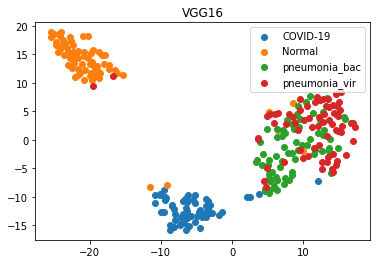

In [8]:
from sklearn.manifold import TSNE

iLM = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('feature_dense').output)

tEG = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE, batch_size=1,shuffle=False,seed=42,class_mode="categorical")

tEG.reset()

classifications = tEG.classes

print(tEG.class_indices)

a = iLM.predict_generator(tEG, verbose=1)

a2 = TSNE().fit_transform(a)

legend = ["COVID-19", "Normal", "pneumonia_bac", "pneumonia_vir"]

plt.title('VGG16')
for i in range(4):
    clusters = a2[np.where(i==classifications)]
    plt.scatter(clusters[:, 0], clusters[:, 1], label = legend[i])
    
plt.legend()



<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

In [9]:
alexnet = Sequential(
    [
        
        Conv2D(filters=96, input_shape=(224,224,3),kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        
        Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid', activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
        
        Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
        
        Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
        MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
        
        Flatten(),
        Dense(256, activation='relu', name='feature_dense'),
        
        Dropout(.4),
        
        Dense(4096, activation = 'relu'),
        Dropout(.4),
        
        Dense(1000, activation = 'relu'),
        Dropout(.4),
        
        Dense(4, activation='softmax')
    ]
)

alexnet.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 384)        

In [11]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

history = model.fit_generator(steps_per_epoch = STEP_SIZE_TRAIN, generator = train_batches, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID, epochs=115)

22
6
Epoch 1/115


C:\Users\kpete\AppData\Local\Temp/ipykernel_14888/693659470.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(steps_per_epoch = STEP_SIZE_TRAIN, generator = train_batches, validation_data = valid_batches, validation_steps = STEP_SIZE_VALID, epochs=115)


21/21 [==============================] - 17s 794ms/step - loss: 0.2179 - accuracy: 0.8155 - val_loss: 0.2627 - val_accuracy: 0.7000
Epoch 2/115
21/21 [==============================] - 17s 797ms/step - loss: 0.2206 - accuracy: 0.8155 - val_loss: 0.2658 - val_accuracy: 0.7200
Epoch 3/115
21/21 [==============================] - 17s 794ms/step - loss: 0.2045 - accuracy: 0.8398 - val_loss: 0.2884 - val_accuracy: 0.6800
Epoch 4/115
21/21 [==============================] - 17s 797ms/step - loss: 0.2082 - accuracy: 0.8350 - val_loss: 0.3265 - val_accuracy: 0.7000
Epoch 5/115
21/21 [==============================] - 17s 793ms/step - loss: 0.2150 - accuracy: 0.8495 - val_loss: 0.3604 - val_accuracy: 0.6000
Epoch 6/115
21/21 [==============================] - 17s 798ms/step - loss: 0.2379 - accuracy: 0.7961 - val_loss: 0.3384 - val_accuracy: 0.6000
Epoch 7/115
21/21 [==============================] - 17s 797ms/step - loss: 0.2345 - accuracy: 0.7767 - val_loss: 0.3383 - val_accuracy: 0.6000
Epoc

21/21 [==============================] - 16s 770ms/step - loss: 0.1919 - accuracy: 0.8107 - val_loss: 0.2948 - val_accuracy: 0.7400
Epoch 114/115
21/21 [==============================] - 16s 772ms/step - loss: 0.1749 - accuracy: 0.8738 - val_loss: 0.3351 - val_accuracy: 0.7000
Epoch 115/115
21/21 [==============================] - 16s 773ms/step - loss: 0.1831 - accuracy: 0.8301 - val_loss: 0.3377 - val_accuracy: 0.6800


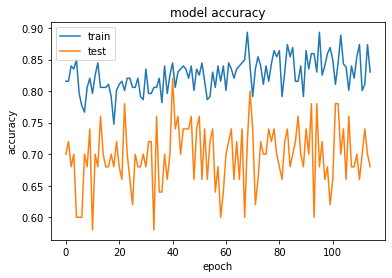

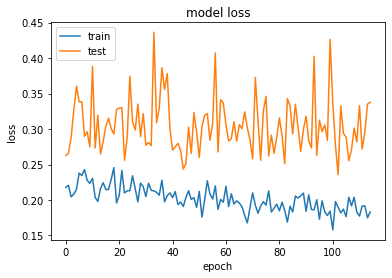

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36
 2/36 [>.............................] - ETA: 2s - loss: 2.0855 - accuracy: 0.5000    

C:\Users\kpete\AppData\Local\Temp/ipykernel_14888/463003407.py:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),


36/36 [==============================] - 3s 80ms/step - loss: 0.4222 - accuracy: 0.6667
Test loss: 0.4221991002559662
Test accuracy: 0.6666666865348816


Found 270 images belonging to 4 classes.
{'covid': 0, 'normal': 1, 'pneumonia_bac': 2, 'pneumonia_vir': 3}
  1/270 [..............................] - ETA: 46s

C:\Users\kpete\AppData\Local\Temp/ipykernel_14888/1634499548.py:13: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  a = iLM.predict_generator(tEG, verbose=1)


270/270 [==============================] - 20s 73ms/step


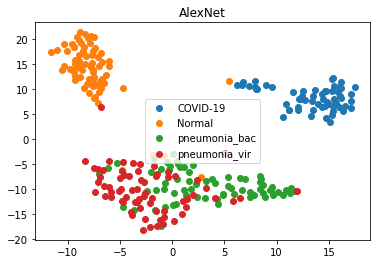

In [16]:
from sklearn.manifold import TSNE

iLM = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer('feature_dense').output)

tEG = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE, batch_size=1,shuffle=False,seed=42,class_mode="categorical")

tEG.reset()

classifications = tEG.classes

print(tEG.class_indices)

a = iLM.predict_generator(tEG, verbose=1)

a2 = TSNE().fit_transform(a)

legend = ["COVID-19", "Normal", "pneumonia_bac", "pneumonia_vir"]

plt.title('AlexNet')
for i in range(4):
    clusters = a2[np.where(i==classifications)]
    plt.scatter(clusters[:, 0], clusters[:, 1], label = legend[i])
    
plt.legend()
